# Знакомство с набором данных о выданных Дептрансом Москвы разрешениях такси

Департамент транспорта и развития дорожно-транспортной инфраструктуры города Москвы (далее – Департамент) выдает разрешения на осуществление деятельности по перевозке пассажиров и багажа легковым такси на территории города Москвы (далее – разрешение).

Данные о выданных разрешениях публикуются в машиночитаемом виде на портале открытых данных правительства Москвы: https://data.mos.ru/opendata/7704786030-vydannye-razresheniya-na-osushchestvlenie-deyatelnosti-po-perevozke-passajirov-i-bagaja-legkovym-taksi

Дата последнего обновления набора - 28.06.2018

Попробуем познакомится с этим набором данных и сделать какие-нибудь полезные выводы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("msc_lic.csv", delimiter=";", encoding = "cp1251")

In [3]:
data.shape #узнаем количество строк и столбцов нашего датафрейма

(99997, 18)

In [4]:
data.head() #посмотрим на пять первых строк

,LicenseNumber,global_id,VehicleNumber,INN,OGRN,BlankNumber,VehicleBrand,VehicleYear,FullName,ShortName,LicenseDate,LicenseEndDate,ValidityDate,EditDate,Info,Status,VehicleModel,Unnamed: 17
0,54012.0,14174025,УУ50277,7.736680e+09,1.147747e+12,Серия МСК № 062005,FORD,2015.0,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ «БЕТА»,ООО «БЕТА»,15.06.2015,14.06.2020,с 15.06.2015 до 14.06.2020,17.03.2017,Разрешение аннулировано,Аннулировано,GALAXY,NaN
1,54013.0,14174027,УМ76477,7.736680e+09,1.147747e+12,Серия МСК № 062006,FORD,2015.0,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ «БЕТА»,ООО «БЕТА»,15.06.2015,14.06.2020,с 15.06.2015 до 14.06.2020,17.03.2017,Разрешение аннулировано,Аннулировано,GALAXY,NaN
2,42584.0,660335888,КЕ37077,7.713651e+11,3.117746e+14,Серия МСК № 048754,CHEVROLET,2014.0,Жарый Алексей Владимирович,Жарый Алексей Владимирович,27.06.2014,26.06.2019,с 27.06.2014 до 26.06.2019,27.06.2014,Разрешение действующее,Действующее,CRUZE KL1J,NaN
3,54318.0,660335889,КО92277,5.433288e+10,3.060562e+14,Серия МСК № 062326,ХЕНДЭ,2015.0,АБАКАРОВА РАЗИЯТ ДАДАМОВНА,АБАКАРОВА РАЗИЯТ ДАДАМОВНА,17.06.2015,16.06.2020,с 17.06.2015 до 16.06.2020,17.06.2015,Разрешение действующее,Действующее,СОЛЯРИС,NaN
4,28402.0,660335890,Х777ТА25,7.743744e+09,1.097746e+12,Серия МСК № 031069,Hyundai,2010.0,Общество с ограниченной ответственностью «Стат...,ООО «СтатТрейдГруп»,15.04.2013,14.04.2018,с 15.04.2013 до 14.04.2018,13.02.2016,NaN,Истек срок действия,SantaFE,NaN


# Снижение размерности

Строки INN, OGRN, FullName, ShortName по сути отражают одно значение - получателя лицензии. Оставим только INN. ValidityDate и Info также являются линейно зависимыми (от пары признаков LicenseDate-LicenseEndDate и признака Status сооответственно). Unnamed: 17 полностью неинформативен.

In [5]:
data = data.drop(columns=['OGRN', 'FullName', 'ShortName', 'ValidityDate', 'Info', 'Unnamed: 17'])

In [6]:
data.head()

,LicenseNumber,global_id,VehicleNumber,INN,BlankNumber,VehicleBrand,VehicleYear,LicenseDate,LicenseEndDate,EditDate,Status,VehicleModel
0,54012.0,14174025,УУ50277,7.736680e+09,Серия МСК № 062005,FORD,2015.0,15.06.2015,14.06.2020,17.03.2017,Аннулировано,GALAXY
1,54013.0,14174027,УМ76477,7.736680e+09,Серия МСК № 062006,FORD,2015.0,15.06.2015,14.06.2020,17.03.2017,Аннулировано,GALAXY
2,42584.0,660335888,КЕ37077,7.713651e+11,Серия МСК № 048754,CHEVROLET,2014.0,27.06.2014,26.06.2019,27.06.2014,Действующее,CRUZE KL1J
3,54318.0,660335889,КО92277,5.433288e+10,Серия МСК № 062326,ХЕНДЭ,2015.0,17.06.2015,16.06.2020,17.06.2015,Действующее,СОЛЯРИС
4,28402.0,660335890,Х777ТА25,7.743744e+09,Серия МСК № 031069,Hyundai,2010.0,15.04.2013,14.04.2018,13.02.2016,Истек срок действия,SantaFE


Метод describe показывает основные статистические характеристики по целочисленным и вещественным признакам: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [7]:
data.describe()

,LicenseNumber,global_id,INN,VehicleYear
count,99987.000000,9.999700e+04,9.998700e+04,99987.000000
mean,49996.033824,6.751152e+08,1.802267e+11,2012.968976
std,28865.801371,4.880417e+07,3.043374e+11,3.516229
min,1.000000,1.417402e+07,7.250036e+08,1968.000000
25%,24998.500000,6.603783e+08,7.716811e+09,2011.000000
50%,49995.000000,6.604076e+08,7.727235e+09,2014.000000
75%,74991.500000,6.604362e+08,2.115016e+11,2015.000000
max,99999.000000,8.617584e+08,9.715013e+11,2018.000000


LicenseNumber, global_id, INN являются кодовыми значениями, поэтому осмысленные выводы можно сделать только по признаку VehicleYear.

Итак, в среднем автомобиль такси в Москве имеет возраст 5 лет. Старейший автомобиль такси - 1968 (!) годы выпуска.

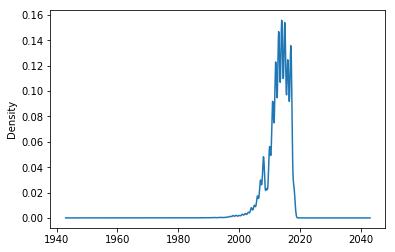

In [8]:
data['VehicleYear'].plot(kind='kde')
plt.show()

In [9]:
status_values = data.Status.unique() # узнаем, какие значения принимает признак Status
print repr(status_values).decode("unicode-escape")

array([u'Аннулировано',
       u'Действующее',
       u'Истек срок действия',
       u'Приостановлено',
       u'Прекращено действие',
       nan], dtype=object)


In [10]:
# заменим строковые значения на булевы
data['Status'] = data['Status'].replace({u'Аннулировано': False,
                                         u'Действующее': True,
                                         u'Истек срок действия': False,
                                         u'Приостановлено': False,
                                         u'Прекращено действие': False})

In [11]:
VehicleBrand_values = data.VehicleBrand.unique()
print repr(VehicleBrand_values).decode("unicode-escape")


array([u'FORD', u'CHEVROLET', u'ХЕНДЭ',
       u'Hyundai', u'Ford', u'ШКОДА',
       u'Киа', u'HYUNDAI', u'KIA', u'SKODA', u'RENAULT',
       u'Шкода', u'Skoda',
       u'Форд', u'КИА',
       u'форд', u'CITROEN', u'NISSAN',
       u'РЕНО', u'TOYOTA', u'HYNDAI',
       u'Ниссан', u'Kia', u'VOLKSWAGEN',
       u'MERCEDES',
       u'Фольксваген',
       u'ТОЙОТА', u'MAZDA',
       u'Хендэ', u'GEELY',
       u'Рено', u'HONDA', u'Пежо',
       u'ФОЛЬКСВАГЕН',
       u'VAZ', u'Chevrolet', u'Daewoo', u'hyundai',
       u'хендэ', u'Mitsubishi', u'Volkswagen',
       u'KIAFG', u'MITSUBISHI', u'Nissan', u'LIFAN',
       u'рено', u'ФОРД', u'OPEL',
       u'Нyundai', u'AUDI', u'Honda', u'kia', u'DAEWOO',
       u'НИССАН', u'VAZ 21140',
       u'Мерседес-Бенц',
       u'КIА', u'Opel', u'TESLA S', u'IMYA-M',
       u'шкода', u'volkswagen', u'КIA',
       u'FIAT', u'ХЕНДАЙ',
       u'СИТРОЕН', u'Mercedes',
       u'LEXUS', u'GАZ',
       u'Шевроле', u'PEUGEOT',
       u'MERCEDES-BENZ', u'Опель', u'D

Как видно, строгой единообразности при сборе данных о марках автомобилей такси не было. Исправим положение вручную.

In [12]:
data['VehicleBrand'] = data['VehicleBrand'].replace({u'ХЕНДЭ': u'HYUNDAI',
                                                    u'Hyundai': u'HYUNDAI',
                                                    u'hyundai':u'HYUNDAI',
                                                    u'хендэ':u'HYUNDAI',
                                                    u'Нyundai':u'HYUNDAI',
                                                    u'ХЕНДАЙ':u'HYUNDAI',
                                                    u'Honda':u'HONDA',
                                                    u'Mitsubishi':u'MITSUBISHI',
                                                    u'Nissan':u'NISSAN',
                                                    u'nissan':u'NISSAN',
                                                    u'НИССАН':u'NISSAN',
                                                    u'Ниссан':u'NISSAN',
                                                    u'ниссан':u'NISSAN',
                                                    u'Chevrolet':u'CHEVROLET',
                                                    u'Шевроле':u'CHEVROLET',
                                                    u'ШЕВРОЛЕ':u'CHEVROLET',
                                                    u'Daewoo':u'DAEWOO',
                                                    u'Ford':u'FORD',
                                                    u'ФОРД':u'FORD',
                                                    u'ШКОДА':u'SKODA',
                                                    u'Шкода':u'SKODA',
                                                    u'шкода':u'SKODA',
                                                    u'Skoda':u'SKODA',
                                                    u'Киа':u'KIA',
                                                    u'КIА':u'KIA',
                                                    u'КIA':u'KIA',
                                                    u'Форд':u'FORD',
                                                    u'КИА':u'KIA',
                                                    u'KIAFG':u'KIA',
                                                    u'форд':u'FORD',
                                                    u'РЕНО':u'RENAULT',
                                                    u'рено':u'RENAULT',
                                                    u'Ниссан':u'NISSAN',
                                                    u'Kia':u'KIA',
                                                    u'kia':u'KIA',
                                                    u'KIA FB2272':u'KIA',
                                                    u'Фольксваген':u'VOLKSWAGEN',
                                                    u'ФОЛЬКСВАГЕН':u'VOLKSWAGEN',
                                                    u'Volkswagen':u'VOLKSWAGEN',
                                                    u'volkswagen':u'VOLKSWAGEN',
                                                    u'фольксваген':u'VOLKSWAGEN',
                                                    u'ТОЙОТА':u'TOYOTA',
                                                    u'Тойота':u'TOYOTA',
                                                    u'Toyota':u'TOYOTA',
                                                    u'Хендэ':u'HYUNDAI',
                                                    u'Рено':u'RENAULT',
                                                    u'Renault':u'RENAULT',
                                                    u'Пежо':u'PEUGEOT',
                                                    u'пежо':u'PEUGEOT',
                                                    u'ПЕЖО':u'PEUGEOT',
                                                    u'Peugeot':u'PEUGEOT',
                                                    u'peugeot':u'PEUGEOT',
                                                    u'VAZ 21140':u'VAZ',
                                                    u'Мерседес-Бенц':u'MERCEDES-BENZ',
                                                    u'Mercedes':u'MERCEDES-BENZ',
                                                    u'Mercedes-Benz':u'MERCEDES-BENZ',
                                                    u'MERCEDES':u'MERCEDES-BENZ',
                                                    u'Opel':u'OPEL',
                                                    u'opel':u'OPEL',
                                                    u'опель':u'OPEL',
                                                    u'Опель':u'OPEL',
                                                    u'ОПЕЛЬ':u'OPEL',
                                                    u'TESLA S':u'TESLA',
                                                    u'СИТРОЕН':u'CITROEN',
                                                    u'Citroen':u'CITROEN',
                                                    u'GАZ':u'GAZ',
                                                    u'gaz':u'GAZ',
                                                    u'ГАЗ':u'GAZ',
                                                    u'Lifan':u'LIFAN',
                                                    u'lifan':u'LIFAN',
                                                    u'Лифан':u'LIFAN',
                                                    u'Mazda':u'MAZDA',
                                                    u'Мазда':u'MAZDA',
                                                    u'МАЗДА':u'MAZDA',
                                                    u'БМВ':u'BMW',
                                                    u'ВАЗ':u'VAZ'
                                                    })

Удалим "хвост" распределения выборки. Условно установим, что "хвостом" являются элементы, значения признаков VehicleBrand в сумме меньше или равно по количеству, чем 50.

In [13]:
threshold = 50
for col in data:
    vc = data.VehicleBrand.value_counts()
    vals_to_remove = vc[vc <= threshold].index.values
    data.VehicleBrand.loc[data.VehicleBrand.isin(vals_to_remove)] = None

/home/nikolai/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
data.VehicleBrand.value_counts()

HYUNDAI          22341
FORD             17071
SKODA            14727
KIA               9104
RENAULT           7122
CHEVROLET         6316
VOLKSWAGEN        5978
NISSAN            3761
TOYOTA            2080
CITROEN           1114
MERCEDES-BENZ     1082
DAEWOO             894
OPEL               753
PEUGEOT            730
LIFAN              712
GEELY              697
VAZ                630
MITSUBISHI         578
MAZDA              456
GAZ                254
AUDI               226
LADA               209
HONDA              162
BMW                143
FIAT               128
VOLVO              120
ZAZ                108
CHERY               81
DODGE               66
LEXUS               61
Name: VehicleBrand, dtype: int64

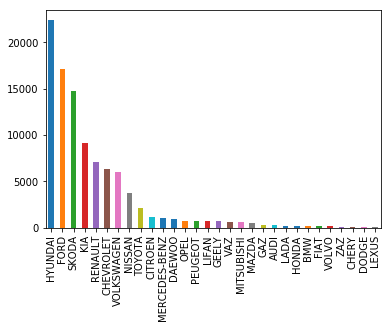

In [15]:
data.VehicleBrand.value_counts().plot(kind='bar')
plt.show()

Итак, мы выяснили, что самой популярной маркой легкового такси является Hyundai. За ним следуют Ford, Skoda и KIA.

In [16]:
data.head()

,LicenseNumber,global_id,VehicleNumber,INN,BlankNumber,VehicleBrand,VehicleYear,LicenseDate,LicenseEndDate,EditDate,Status,VehicleModel
0,54012.0,14174025,УУ50277,7.736680e+09,Серия МСК № 062005,FORD,2015.0,15.06.2015,14.06.2020,17.03.2017,False,GALAXY
1,54013.0,14174027,УМ76477,7.736680e+09,Серия МСК № 062006,FORD,2015.0,15.06.2015,14.06.2020,17.03.2017,False,GALAXY
2,42584.0,660335888,КЕ37077,7.713651e+11,Серия МСК № 048754,CHEVROLET,2014.0,27.06.2014,26.06.2019,27.06.2014,True,CRUZE KL1J
3,54318.0,660335889,КО92277,5.433288e+10,Серия МСК № 062326,HYUNDAI,2015.0,17.06.2015,16.06.2020,17.06.2015,True,СОЛЯРИС
4,28402.0,660335890,Х777ТА25,7.743744e+09,Серия МСК № 031069,HYUNDAI,2010.0,15.04.2013,14.04.2018,13.02.2016,False,SantaFE


Заменим строковые значения признака 'VehicleBrand' на целочисленные

In [17]:
data['VehicleBrand'] = pd.factorize(data['VehicleBrand'])[0]


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

enc = LabelEncoder()
enc.fit(data["VehicleBrand"])

LabelEncoder()

Удалим значения NaN и проверим изменение количества объектов датасета.

In [19]:
data.shape

(99997, 12)

In [20]:
data = data.dropna()
data.shape

(99987, 12)

Обучим модель случайного леса на отложенной выборке

In [21]:
X = data[["INN", "VehicleBrand", "VehicleYear"]]
y = np.asarray(data["Status"], dtype="bool")

X_train, X_test = X[:75000], X[75000:]
y_train, y_test = y[:75000], y[75000:]

In [22]:
clf = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=241).fit(X_train, y_train)
clf.score(X_test, y_test)


0.9085924680834033

Результат ~0.91 достаточно хорош. Теперь обучим такую же модель с кросс-валидацией.

In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

clf_1 = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=241)
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=None)
scores = cross_val_score(clf_1, X, y, scoring='roc_auc', cv=cv)
print(scores)
print(scores.mean())

[0.87885225 0.8766434  0.87595484 0.87389034 0.8723694  0.87692724
 0.87623016]
0.875838233195397


Кросс-валидация дает несколько худший результат.

Теперь оценим вклад каждого признака в решение задачи классификации.

In [24]:
list(zip(X, clf.feature_importances_))

[(u'INN', 0.1609141855436883),
 (u'VehicleBrand', 0.3034269569717216),
 (u'VehicleYear', 0.5356588574845902)]

Как видно, наиболее важным признаком при определении действия лицензии является год выпуска автомобиля. Лицензиат, которого мы договорились определять по ИНН, является наименее важным.

# Итог

Проанализировав набор данных о выданных Дептрансом Москвы разрешениях такси мы выяснили:
* В среднем автомобиль такси в Москве имеет возраст 5 лет. Старейший автомобиль такси - 1968 (!) годы выпуска.
* Самой популярной маркой легкового такси в Москве является Hyundai. За ним следуют Ford, Skoda и KIA.
* Наиболее важным признаком при определении действия лицензии является год выпуска автомобиля. Лицензиат, которого мы договорились определять по ИНН, является наименее важным.